In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

#libray for model constructing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
#The Environment and Health Data Portal: Data: https://github.com/nychealth/EHDP-data

In [2]:
mobility_mode = pd.read_csv('mobility_mode.csv')
mobility_mode.head(3)

,qGENDER,qAGECODE,qRACECODE,qEDUCATION,qINCOME,qSURVEYZONE,qZIPHOME,qBOROUGH,qLICENSE,qCARACCESS,...,Ferry,Access-A-Ride,Membership_CarSharing,Disability_Hearing,Disability_Seeing,Disability_Walking,Disability_DailyActivity,Disability_Mental,Welfare,Freight_Usage
0,Female,35-44,"White, Non-Hispanic","Graduate degree (i.e., Master's, Professional,...","$150,000-$199,999",Inner Queens,11372.0,Queens,Yes,Yes,...,No,No,No,No,No,No,No,No,No,A few times a year
1,Male,45-54,"White, Non-Hispanic","Graduate degree (i.e., Master's, Professional,...","$200,000 and above",Outer Brooklyn,11235.0,Brooklyn,Yes,No,...,No,No,No,No,No,No,No,No,No,Several times a week
2,Male,35-44,"Black, Non-Hispanic","Associate degree (i.e., AA, AS)","$25,000 - $34,999",Southern Bronx,10467.0,The Bronx,No,No,...,No,No,Yes,No,No,No,No,No,NYCHA Tenant/Section8 Recipent,A few times a month


## Feature Selection
when both of variables are categorical, then the strength of the relationship between them can be measured using a Chi-square test
<hr>
Chi-square test finds the probability of a Null hypothesis(H0).

*   Assumption(H0): The two columns are NOT related to each other
*   Result of Chi-Sq Test: The Probability of H0 being True
*   the P-value came higher than 0.05. Hence H0 will be accepted,which means the variables are not correlated with each other




**Data Encoding**
encode nominal and ordinal data seperately

In [3]:
### how to handle overlapping class
# multi label classification
alter_col =['Walk', 'Train/Subway', 'Bus', 'Ferry', 'Access-A-Ride']

#use selectKBest from feature_selection
# reference: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
X = mobility_mode.loc[:,~mobility_mode.columns.isin(['Mode','qSURVEYZONE','qZIPHOME','qBOROUGH','Disability_DailyActivity','qEMPLOYMENTCODE']+alter_col)]
### how to handle overlapping class
# y = mobility_mode.loc[:,'Walk']
y_multi = mobility_mode.loc[:,mobility_mode.columns.isin(alter_col)]

In [4]:
oneHot = ['qRACECODE','qMARRIED','qRENT','qEMPLOYMENT','qINDUSTRY','qWORKLOCATION','Welfare']
ordinal = ['qAGECODE','qEDUCATION','qINCOME','qTRIPPLANAPP','gFREIGHT1b_qFREIGHT1_mA','gFREIGHT1b_qFREIGHT2_mA','gFREIGHT1b_qFREIGHT3_mA',
           'gFREIGHT1b_qFREIGHT4_mA','qAUTOVEHICLEFAM','qAUTOVEHICLEWILL','qAUTOVEHICLESAFE','qBUILDINGb','qCHILDREN','Freight_Usage','qWORKFH',
           'Disability_Walking','Disability_Mental','Disability_Seeing','Disability_Hearing','Membership_CarSharing','qCITIBIKE','qSMARTPHONE',
           'qCARACCESS','qLICENSE','qGENDER']

qAGECODE_cate = ['18-24','25-34','35-44','45-54','55-64','65 or older']
qEDUCATION_cate = ['No high school','Some high school','High school graduate or equivalent (i.e., GED)',
                   'Associate degree (i.e., AA, AS)','Some college but degree not received or in progress',
                   'Bachelor\'s degree (i.e., BA, BS, AB)','Graduate degree (i.e., Master\'s, Professional, Doctorate)']
qINCOME_cate = ['Less than $14,999','$15,000 - $24,999','$25,000 - $34,999','$35,000 - $49,999','$50,000 - $74,999',
                '$75,000 - $99,999','$100,000 - $149,999','$150,000-$199,999','$200,000 and above']
qTRIPPLANAPP_cate = ['Less than a few times a year','A few times a year','Less than once a month','Once a month','A few times a month',
                     'Once a week','Several times a week','Daily']
gFREIGHT1b_qFREIGHT1_mA_cate = ['Not applied','Less than a few times','A few times a year','A few times a month','Several times a week','Daily']
gFREIGHT1b_qFREIGHT2_mA_cate = gFREIGHT1b_qFREIGHT1_mA_cate
gFREIGHT1b_qFREIGHT3_mA_cate = gFREIGHT1b_qFREIGHT1_mA_cate
gFREIGHT1b_qFREIGHT4_mA_cate = gFREIGHT1b_qFREIGHT1_mA_cate
qAUTOVEHICLEFAM_cate = ['Not at all familiar','Not very familiar','Somewhat familiar','Very familiar']
qAUTOVEHICLEWILL_cate = ['Not at all willing','Not very willing','Somewhat willing','Very willing']
qAUTOVEHICLESAFE_cate = ['Don\'t Know','Much less safe than standard vehicles','Somewhat less safe than standard vehicles',
                         'Neither more nor less safe than standard vehicles','Somewhat safer than standard vehicles',
                         'Much safer than standard vehicles']
qBUILDINGb_cate = ['A building with 2 to 9 apartments','A building with 10 to 49 apartments','A building with 50 or more apartments',
                   'A one family house attached to one or more houses','A one family house detached from any other house']
qCHILDREN_cate = ['None','One','Two','Three','Four or more']
Freight_Usage_cate = ['Dont know','Less than a few times','A few times a year','A few times a month','Several times a week','Daily']
qWORKFH_cate = ['Yes, work from home','No, do not work from home']
Disability_Walking_cate = ['Yes','No']
Disability_Mental_cate = ['Yes','No']
Disability_Seeing_cate = ['Yes','No']
Disability_Hearing_cate = ['Yes','No']
Membership_CarSharing_cate = ['Yes','No']
qCITIBIKE_cate = ['Yes','No']
qSMARTPHONE_cate = ['Yes','No']
qCARACCESS_cate = ['Yes','No']
qLICENSE_cate = qCARACCESS_cate
qGENDER_cate = ['Female', 'Male']
categories = [qAGECODE_cate,qEDUCATION_cate,qINCOME_cate,qTRIPPLANAPP_cate,gFREIGHT1b_qFREIGHT1_mA_cate,gFREIGHT1b_qFREIGHT2_mA_cate,
              gFREIGHT1b_qFREIGHT3_mA_cate,gFREIGHT1b_qFREIGHT4_mA_cate,qAUTOVEHICLEFAM_cate,qAUTOVEHICLEWILL_cate,qAUTOVEHICLESAFE_cate,
              qBUILDINGb_cate,qCHILDREN_cate,Freight_Usage_cate,qWORKFH_cate,Disability_Walking_cate,Disability_Mental_cate,
              Disability_Seeing_cate,Disability_Hearing_cate,Membership_CarSharing_cate,qCITIBIKE_cate,qSMARTPHONE_cate,
              qCARACCESS_cate,qLICENSE_cate, qGENDER_cate]

encoder = OrdinalEncoder(categories=categories)
ordinal_enc = encoder.fit_transform(X[ordinal])
ordinal_df = pd.DataFrame(list(map(np.ravel, ordinal_enc)), columns=ordinal,index=X[ordinal].index)

nomial_df = pd.get_dummies(X[oneHot])

X_enc = pd.concat([ordinal_df,nomial_df],axis=1)


#### for targe variables
oe = OrdinalEncoder()
y_multi_enc = oe.fit_transform(y_multi)
y_enc = pd.DataFrame(list(map(np.ravel, y_multi_enc)), columns=alter_col,index=y_multi.index)

y_enc

,Walk,Train/Subway,Bus,Ferry,Access-A-Ride
0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1539,1.0,0.0,0.0,0.0,0.0
1540,0.0,1.0,0.0,0.0,0.0
1541,0.0,0.0,0.0,0.0,0.0
1542,0.0,0.0,0.0,0.0,0.0


## Multi-classification (Walk, Train & Bus)

In [66]:
y_enc['Walk/Train/Bus'] = y_enc['Walk'] + y_enc['Train/Subway'] + y_enc['Bus']
y_enc['Walk/Bus'] = y_enc['Walk'] + y_enc['Bus']

In [68]:
(y_enc['Walk/Train/Bus']==3).sum()

22

# Original code

**Binary Classification** on each communting columns

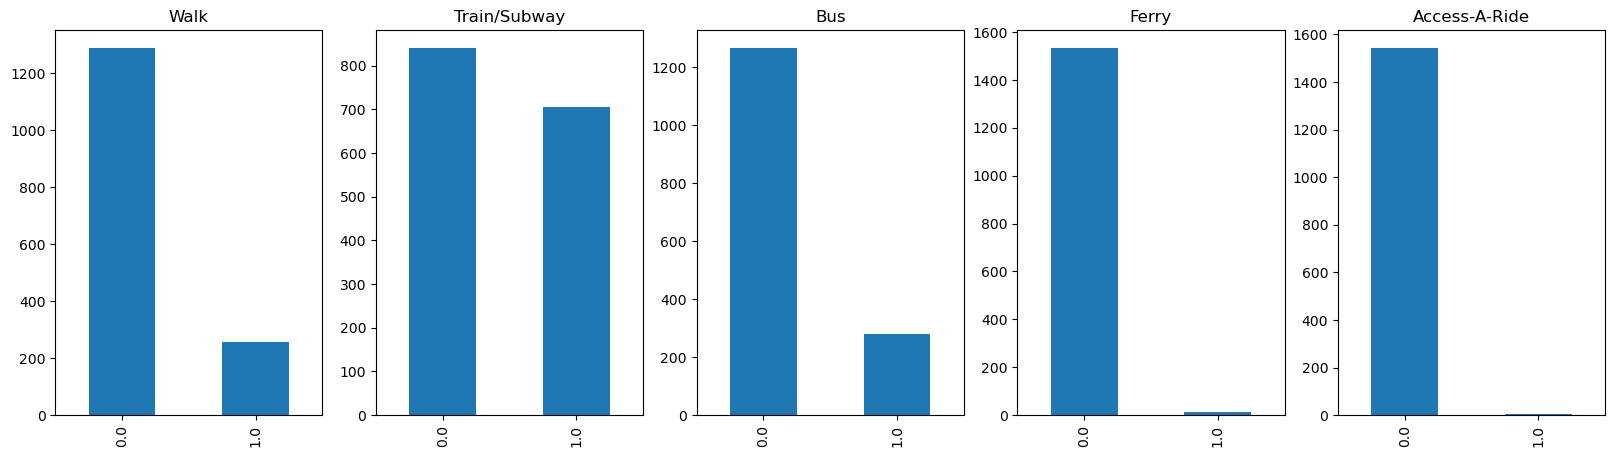

In [69]:
fig, axs = plt.subplots(1, len(alter_col),figsize=(20,5))
idx = 0
for col in alter_col:
    y_enc.loc[:,col].value_counts().plot(kind='bar',ax=axs[idx],title=col)
    idx +=1
fig.savefig('label_obseration.png')

In [70]:
y_multi_enc = y_enc.iloc[:,y_enc.columns.isin(['Walk','Train/Subway','Bus'])]
### Oversampling on walk and bus, keep original record in train/subway

In [71]:
#Feature Selection
def select_features(method, k_num, X_train, y_train, X_test):
    fs = SelectKBest(score_func=method, k=k_num) #chi2
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# # feature selection
# X_train_fs, X_test_fs, fs = select_features(mutual_info_classif, 8, X_train, y_train, X_test)#chi2
# # what are scores for the features
# cols = X_train.columns.values
# score_dict = {}
# for i in range(len(fs.scores_)):
#     score_dict[cols[i]] = fs.scores_[i]

## Modeling (Binary Classification)

In [72]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc['Walk'], test_size=0.2, random_state=1)

# transform the dataset
# oversampling in walk and bus
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (2058, 67) (2058,)
Test (309, 67) (309,)


### Decision Tree

In [73]:
# and optimize the parameter value using GridSearchCV.
param_grid = {'max_depth':range(1,11)}
dt=DecisionTreeClassifier()
gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
rs=gr.fit(X_train,y_train)
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),rs.predict_proba(X_test)[:,1]))

DecisionTreeClassifier(max_depth=5)
0.6598697994612391


In [74]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train, y_train)
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
14,qWORKFH,0.490393
22,qCARACCESS,0.243814
20,qCITIBIKE,0.060853
4,gFREIGHT1b_qFREIGHT1_mA,0.035348
26,"qRACECODE_Black, Non-Hispanic",0.03533


In [75]:
# Let's generate our new training and testing model using the top three features.
top5_features = Feature_importance.sort_values(by="importance",ascending=False).iloc[:4,:].variables.tolist()
X_train_simple=X_train.loc[:,top5_features]
X_test_simple=X_test.loc[:,top5_features]

# Now let's see the performance of this simple model.
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train_simple, y_train)
print("The AUC score for this simple model with 4 features is",roc_auc_score(y_test,dt.predict_proba(X_test_simple)[:,1]))

The AUC score for this simple model with 4 features is 0.6896513020053876


In [23]:
# This will only work if GraphViz is installed on your machine
from sklearn import tree
from IPython.display import Image  
import pydotplus
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train_simple, y_train)
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train_simple.columns.values, 
                         class_names=['walk','no walk'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())  

InvocationException: GraphViz's executables not found

### Random Forest

In [24]:
param_grid = {'n_estimators':range(1,51,2)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train,y_train)
pred=rs.predict_proba(X_test)[:,1]
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

RandomForestClassifier(max_leaf_nodes=10, n_estimators=49, n_jobs=-1)
0.7194702184974558


In [25]:
rf = RandomForestClassifier(max_leaf_nodes=10, n_estimators=41, n_jobs=-1)
rf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
14,qWORKFH,0.271414
22,qCARACCESS,0.113305
26,"qRACECODE_Black, Non-Hispanic",0.086266
3,qTRIPPLANAPP,0.057127
45,qINDUSTRY_Health Care/Social Assistance,0.042908


In [26]:
# Let's generate our new training and testing model using the top three features.
### No improvement after feature selections
top5_features = Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:].variables.tolist()
X_train_simple=X_train.loc[:,top5_features]
X_test_simple=X_test.loc[:,top5_features]

param_grid = {'n_estimators':range(1,51,2)}
rf = RandomForestClassifier(n_jobs=-1,max_leaf_nodes=10)
gs = GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
rs = gs.fit(X_train_simple, y_train)
pred=rs.predict_proba(X_test_simple)[:,1]
print(rs.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

RandomForestClassifier(max_leaf_nodes=10, n_estimators=49, n_jobs=-1)
0.6830290332235858


## AdaBoosting

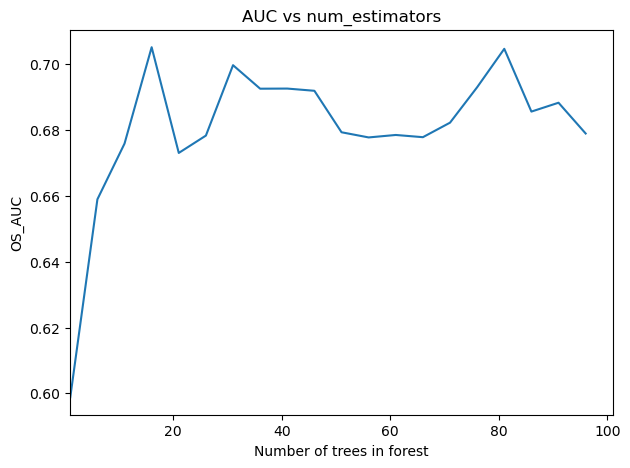

In [27]:
AUC=[]
for i in range(1,101,5):
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    pred=clf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))

plt.figure(figsize=(7,5))
plt.plot(range(1,101,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,101)
plt.show()

In [28]:
param_grid = {'n_estimators':range(1,101,5)}
clf = AdaBoostClassifier()
gs = GridSearchCV(clf,param_grid=param_grid,scoring='roc_auc')
ada = gs.fit(X_train, y_train)
pred=ada.predict_proba(X_test)[:,1]
print(ada.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

AdaBoostClassifier(n_estimators=81)
0.7047291230170607


In [29]:
clf = AdaBoostClassifier(n_estimators=96)
clf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(clf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
11,qBUILDINGb,0.072917
2,qINCOME,0.0625
24,qGENDER,0.052083
3,qTRIPPLANAPP,0.041667
20,qCITIBIKE,0.03125


## Gradient Boosting

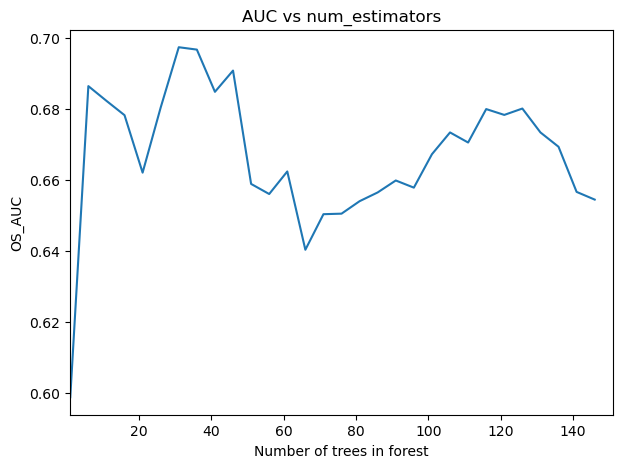

In [30]:
AUC=[]
for i in range(1,151,5):
    clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, max_depth=1, random_state=0)
    clf.fit(X_train, y_train)
    pred=clf.predict_proba(X_test)[:,1]
    AUC.append(roc_auc_score(np.array(y_test),pred))

plt.figure(figsize=(7,5))
plt.plot(range(1,151,5),AUC)
plt.xlabel("Number of trees in forest")
plt.ylabel("OS_AUC")
plt.title("AUC vs num_estimators")
plt.xlim(1,151)
plt.show()

In [31]:
param_grid = {'n_estimators':range(1,151,5)}
clf = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, max_depth=1, random_state=0)
gs = GridSearchCV(clf,param_grid=param_grid,scoring='roc_auc')
gb = gs.fit(X_train, y_train)
pred=gb.predict_proba(X_test)[:,1]
print(gb.best_estimator_)
print(roc_auc_score(np.array(y_test),pred))

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=146,
                           random_state=0)
0.6545196049087099


In [32]:
clf = GradientBoostingClassifier(n_estimators=106, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)

Feature_importance=pd.DataFrame([list(X_train.columns),list(clf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 5 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:5,:]

,variables,importance
14,qWORKFH,0.395434
22,qCARACCESS,0.122401
24,qGENDER,0.065556
26,"qRACECODE_Black, Non-Hispanic",0.062716
11,qBUILDINGb,0.041413


## Naive Bayes

In [33]:
X_train_fs, X_test_fs, fs = select_features(chi2, 6, X_train, y_train, X_test)#chi2/mutual_info_classif

In [34]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB(force_alpha=True)
clf.fit(X_train,y_train)

y_pred_train = clf.predict_proba(X_train)[:,1]
y_pred_test = clf.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))

TypeError: __init__() got an unexpected keyword argument 'force_alpha'

In [35]:
from sklearn.metrics import classification_report

# print(classification_report(y_test, clf.predict_proba(X_test)))

## Bayes Nets

In [36]:
### do we need feature selection before bayes nets
# !pip install pgmpy
from pgmpy.estimators import ExhaustiveSearch
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import K2Score, BicScore, BDeuScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator

In [37]:
X_train_fs, X_test_fs, fs = select_features(mutual_info_classif, 5, X_train, y_train, X_test)#chi2/mutual_info_classif
# what are scores for the features
cols = X_train.columns.values
score_dict = {}
for i in range(len(fs.scores_)):
    score_dict[cols[i]] = fs.scores_[i]
top_attr = sorted(score_dict.items(), key=lambda x: x[1],reverse=True)[:7]
top_attr = [i[0] for i in top_attr]
train,test=train_test_split(pd.concat([X_enc[top_attr],y_enc['Walk']],axis=1),random_state=999,test_size=0.2)

In [38]:
hc = HillClimbSearch(train)
best_model = BayesianNetwork(hc.estimate(scoring_method='BicScore').edges()) # convert DAG to BayesianModel
print(best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('gFREIGHT1b_qFREIGHT4_mA', 'gFREIGHT1b_qFREIGHT2_mA')]


In [39]:
best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
for thenode in best_model.nodes():
    print(best_model.local_independencies(thenode))

CPD of gFREIGHT1b_qFREIGHT4_mA:
+------------------------------+-----------+
| gFREIGHT1b_qFREIGHT4_mA(0.0) | 0.0322321 |
+------------------------------+-----------+
| gFREIGHT1b_qFREIGHT4_mA(1.0) | 0.0950846 |
+------------------------------+-----------+
| gFREIGHT1b_qFREIGHT4_mA(2.0) | 0.313457  |
+------------------------------+-----------+
| gFREIGHT1b_qFREIGHT4_mA(3.0) | 0.38195   |
+------------------------------+-----------+
| gFREIGHT1b_qFREIGHT4_mA(4.0) | 0.141015  |
+------------------------------+-----------+
| gFREIGHT1b_qFREIGHT4_mA(5.0) | 0.0362611 |
+------------------------------+-----------+
CPD of gFREIGHT1b_qFREIGHT2_mA:
+------------------------------+-----+------------------------------+
| gFREIGHT1b_qFREIGHT4_mA      | ... | gFREIGHT1b_qFREIGHT4_mA(5.0) |
+------------------------------+-----+------------------------------+
| gFREIGHT1b_qFREIGHT2_mA(0.0) | ... | 0.02                         |
+------------------------------+-----+------------------------------+
|

In [40]:
best_model.fit(train, estimator=BayesianEstimator, prior_type='K2')
col = ['gFREIGHT1b_qFREIGHT1_mA','gFREIGHT1b_qFREIGHT4_mA','qWORKFH','qAUTOVEHICLESAFE','qAUTOVEHICLEFAM']
train_x = train.loc[:,train.columns.isin(col)]
predicted_train = best_model.predict(train_x)
print("In sample:",(train.loc[:,'Walk'].reset_index(drop=True)==predicted_train['Walk']).mean())

test_x = test.loc[:,test.columns.isin(col)]
predicted_test = best_model.predict(test_x)
print("Out of sample:",(test.loc[:,'Walk'].reset_index(drop=True)==predicted_test['Walk']).mean())

ValueError: Data has variables which are not in the model

## Multi-Label Classification

In [41]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [42]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_multi_enc, test_size=0.2, random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (1235, 67) (1235, 3)
Test (309, 67) (309, 3)


In [43]:
clf = MultiOutputClassifier(LogisticRegression()).fit(X_train, y_train)
clf.score(X_test,y_test)

0.47896440129449835

In [44]:
svc = SVC(gamma="scale")
model = MultiOutputClassifier(estimator=svc)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.4854368932038835

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='lbfgs'), n_jobs=-1)),
            ])
for category in alter_col:

    print('**Processing {} ...**'.format(category))
    
    # Training logistic regression model on train data
    y_train_enc, y_test_enc = prepare_targets(y_train[category], y_test[category])
    LogReg_pipeline.fit(X_train_enc, y_train_enc)
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(y_test_enc)
    print('Test accuracy is {}'.format(accuracy_score(y_test_enc, prediction)))
    print("\n")

**Processing Walk ...**


NameError: name 'prepare_targets' is not defined

In [50]:
from sklearn.model_selection import GridSearchCV
import time
from skmultilearn.adapt import BRkNNaClassifier

parameters = {'k': range(3,5)}
score = 'f1_micro'

start=time.time()

classifier = GridSearchCV(BRkNNaClassifier(), parameters, scoring=score)
classifier.fit(X_train_enc, y_train_enc)

print('training time taken: ',round(time.time()-start,0),'seconds')
print('best parameters :', classifier.best_params_,
      'best score: ',classifier.best_score_)

NameError: name 'X_train_enc' is not defined

In [51]:
# using binary relevance
# !pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())
# train
classifier.fit(X_train_enc, y_train_enc)
# predict
predictions = classifier.predict(X_test_enc)
# accuracy
print("Accuracy = ",accuracy_score(y_test_enc,predictions.toarray()))

NameError: name 'X_train_enc' is not defined

In [52]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train_enc, y_train_enc)
# predict
predictions = classifier.predict(X_test_enc)
# accuracy
print("Accuracy = ",accuracy_score(y_test_enc,predictions.toarray()))

NameError: name 'X_train_enc' is not defined